In [2]:
cd((@__DIR__) * raw"\..")
include("../table_reader.jl")

extract_series (generic function with 1 method)

In [3]:
series=extract_series("TX_STAID000031.txt",plot=false)
years=unique(Dates.year.(series.DATE))

#Imputing missing values
# include("utils/Missing_values.jl")
# ImputeMissingValues!(series[!,2],series.DATE)
# N=length(series[!,2])

107-element Vector{Int64}:
 1897
 1898
 1899
 1900
 1901
 1902
 1903
 1904
 1905
 1906
    ⋮
 1995
 1996
 1997
 1998
 1999
 2000
 2001
 2002
 2003

## I. Series filtered by removing a trigonometric periodicity

In [4]:
include("../utils/periodicity.jl")
trigo_function=fitted_periodicity_fonc(series[!,2],series.DATE)
periodicity=trigo_function.(series.DATE)
x=series[!,2]-periodicity

38758-element Vector{Float64}:
  0.07104304037398812
  0.8205179297211718
  1.5675970551600766
 -1.1877335153749673
  2.654512999148631
  0.29432409677359495
  4.231687996252475
  3.866593640534054
  3.499030700035446
  4.628989575698913
  ⋮
  3.115653785732892
  0.9864740732926229
 -0.5439076135917666
 -1.475452691233622
  0.39187776833445476
  3.1581230258407125
  3.52332266315587
  1.9875165715796825
  2.5507449400359867

## Segmenting the dataset by month

In [5]:
include("../utils/Separation.jl")
Monthly_date=MonthlySeparateDates(series.DATE)
Monthly_temp=MonthlySeparateX(x,series.DATE)

12-element Vector{Vector{AbstractVector}}:
 [[0.07104304037398812, 0.8205179297211718, 1.5675970551600766, -1.1877335153749673, 2.654512999148631, 0.29432409677359495, 4.231687996252475, 3.866593640534054, 3.499030700035446, 4.628989575698913  …  -2.007288483956472, -8.510082906974825, -11.01541200259843, -7.2232741937948015, -0.6336671539157042, -0.14658780738567856, -5.962032330612191, -5.979996153117135, -3.6004739588893795, -5.123459687957929], [-0.22895695962601081, 0.9205179297211714, 4.267597055160076, 2.712266484625033, 2.5545129991486313, 0.8943240967735946, 1.1316879962524755, 1.5665936405340553, 1.199030700035447, 1.9289895756989122  …  2.992711516043528, 5.089917093025177, 1.1845879974015698, 4.476725806205199, 1.4663328460842955, 1.6534121926143204, 3.7379676693878103, 1.6200038468828648, -0.4004739588893802, 4.876540312042071], [-1.7289569596260108, 3.7205179297211703, -2.3324029448399237, 0.4122664846250341, 4.35451299914863, 4.094324096773596, 2.831687996252475, 3.06659

## Autocorrelations

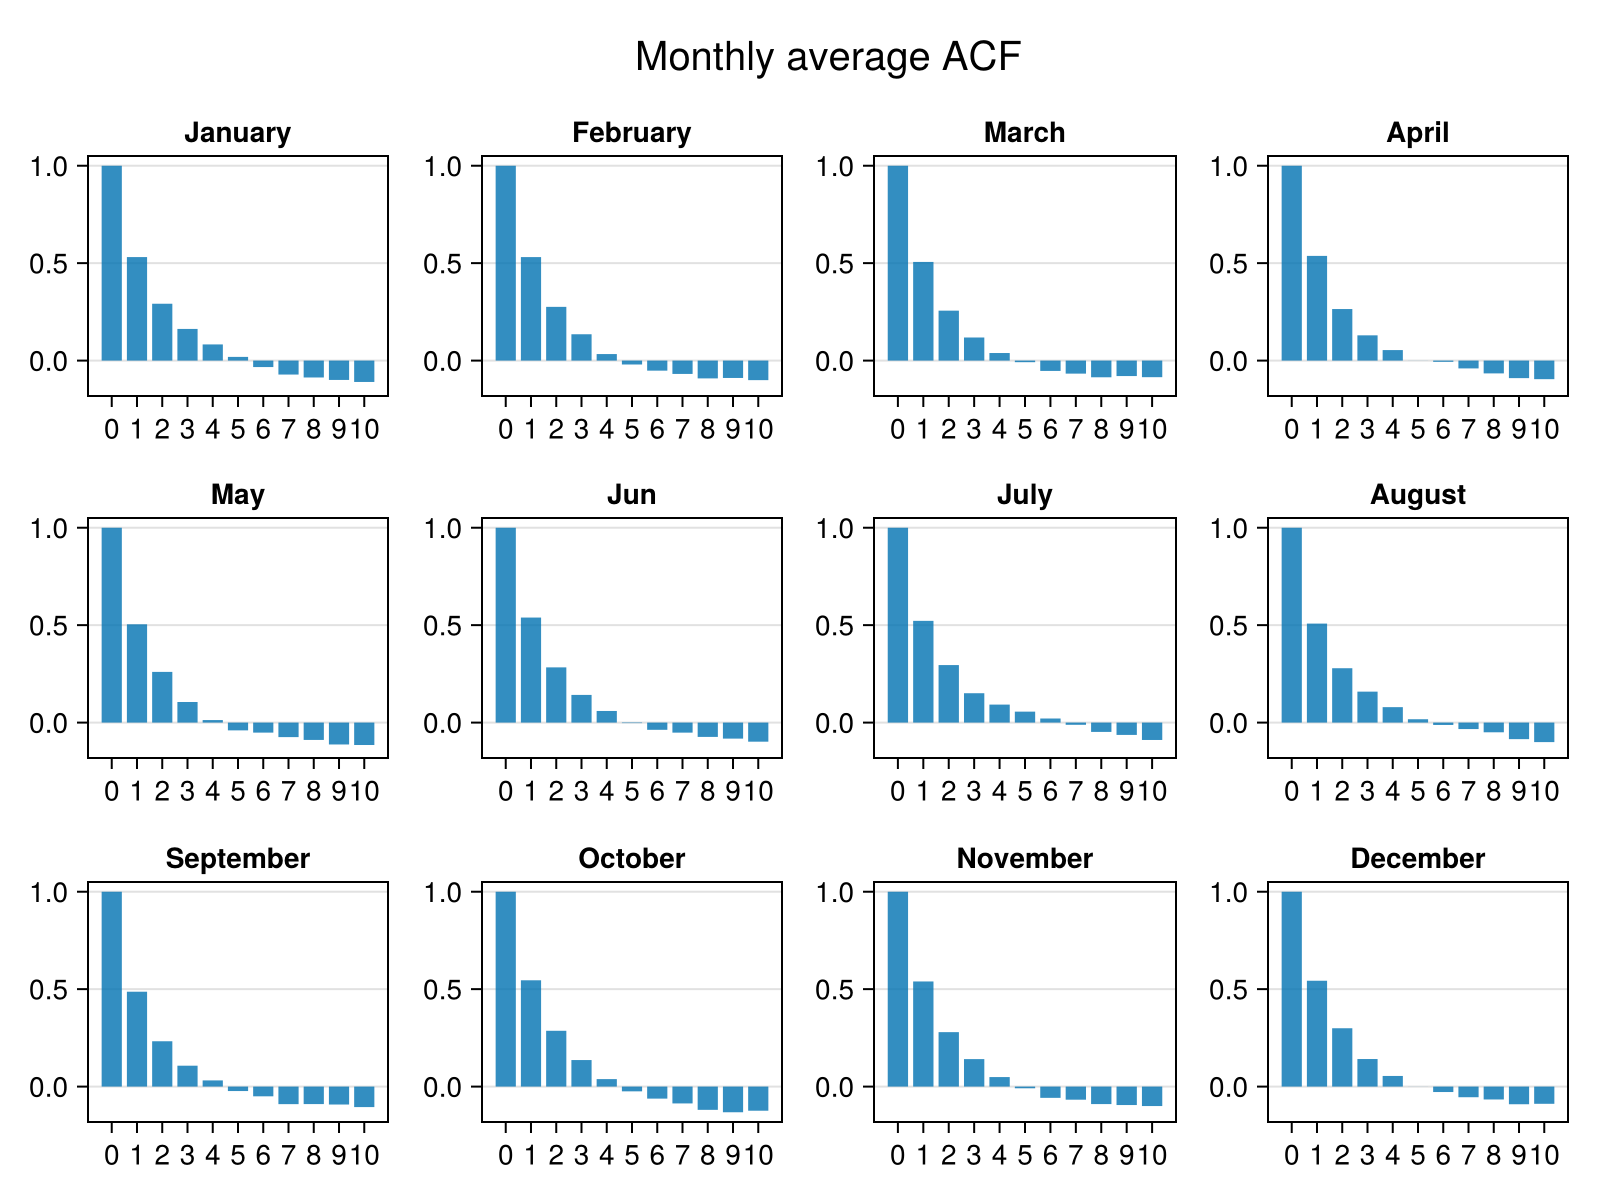

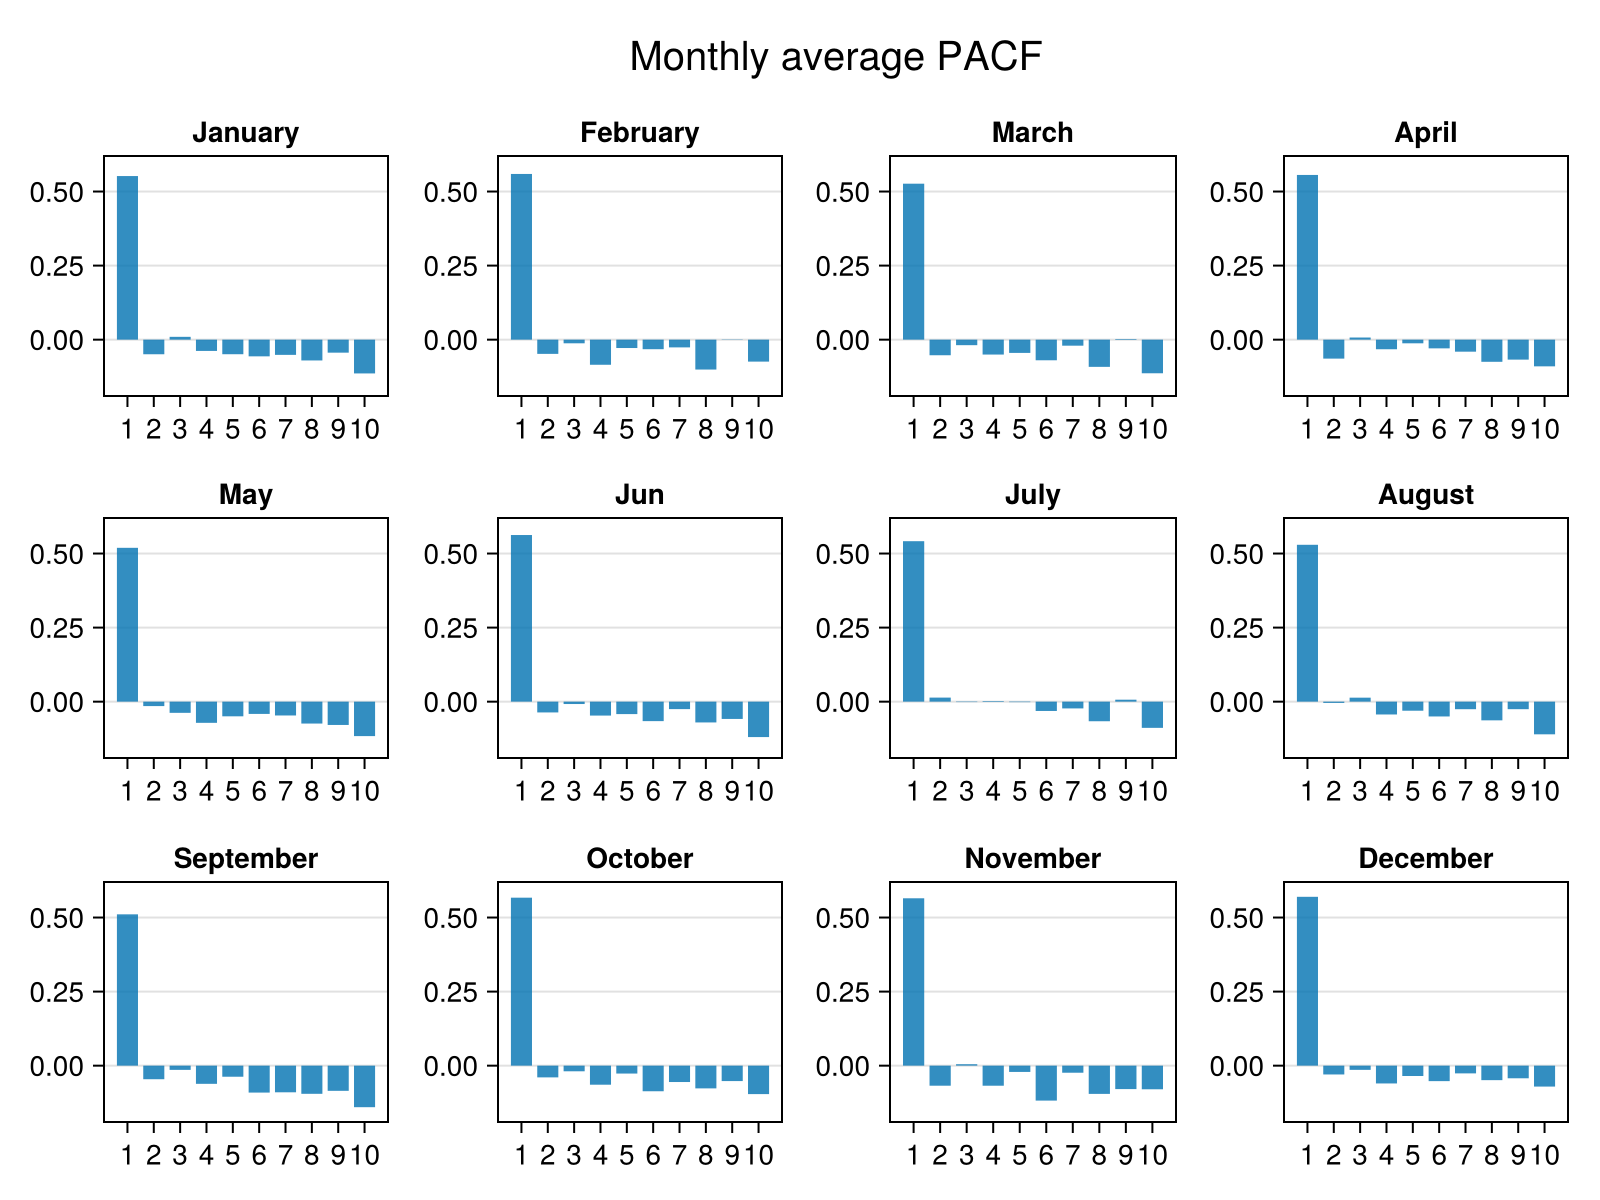

CairoMakie.Screen{IMAGE}


In [6]:
include("../utils/ACF_PACF.jl")
display(MonthlyACF(Monthly_temp))
display(MonthlyPACF(Monthly_temp))

For each month, it still looks like an AR(1) model

# Estimation AR(1)

## Estimation

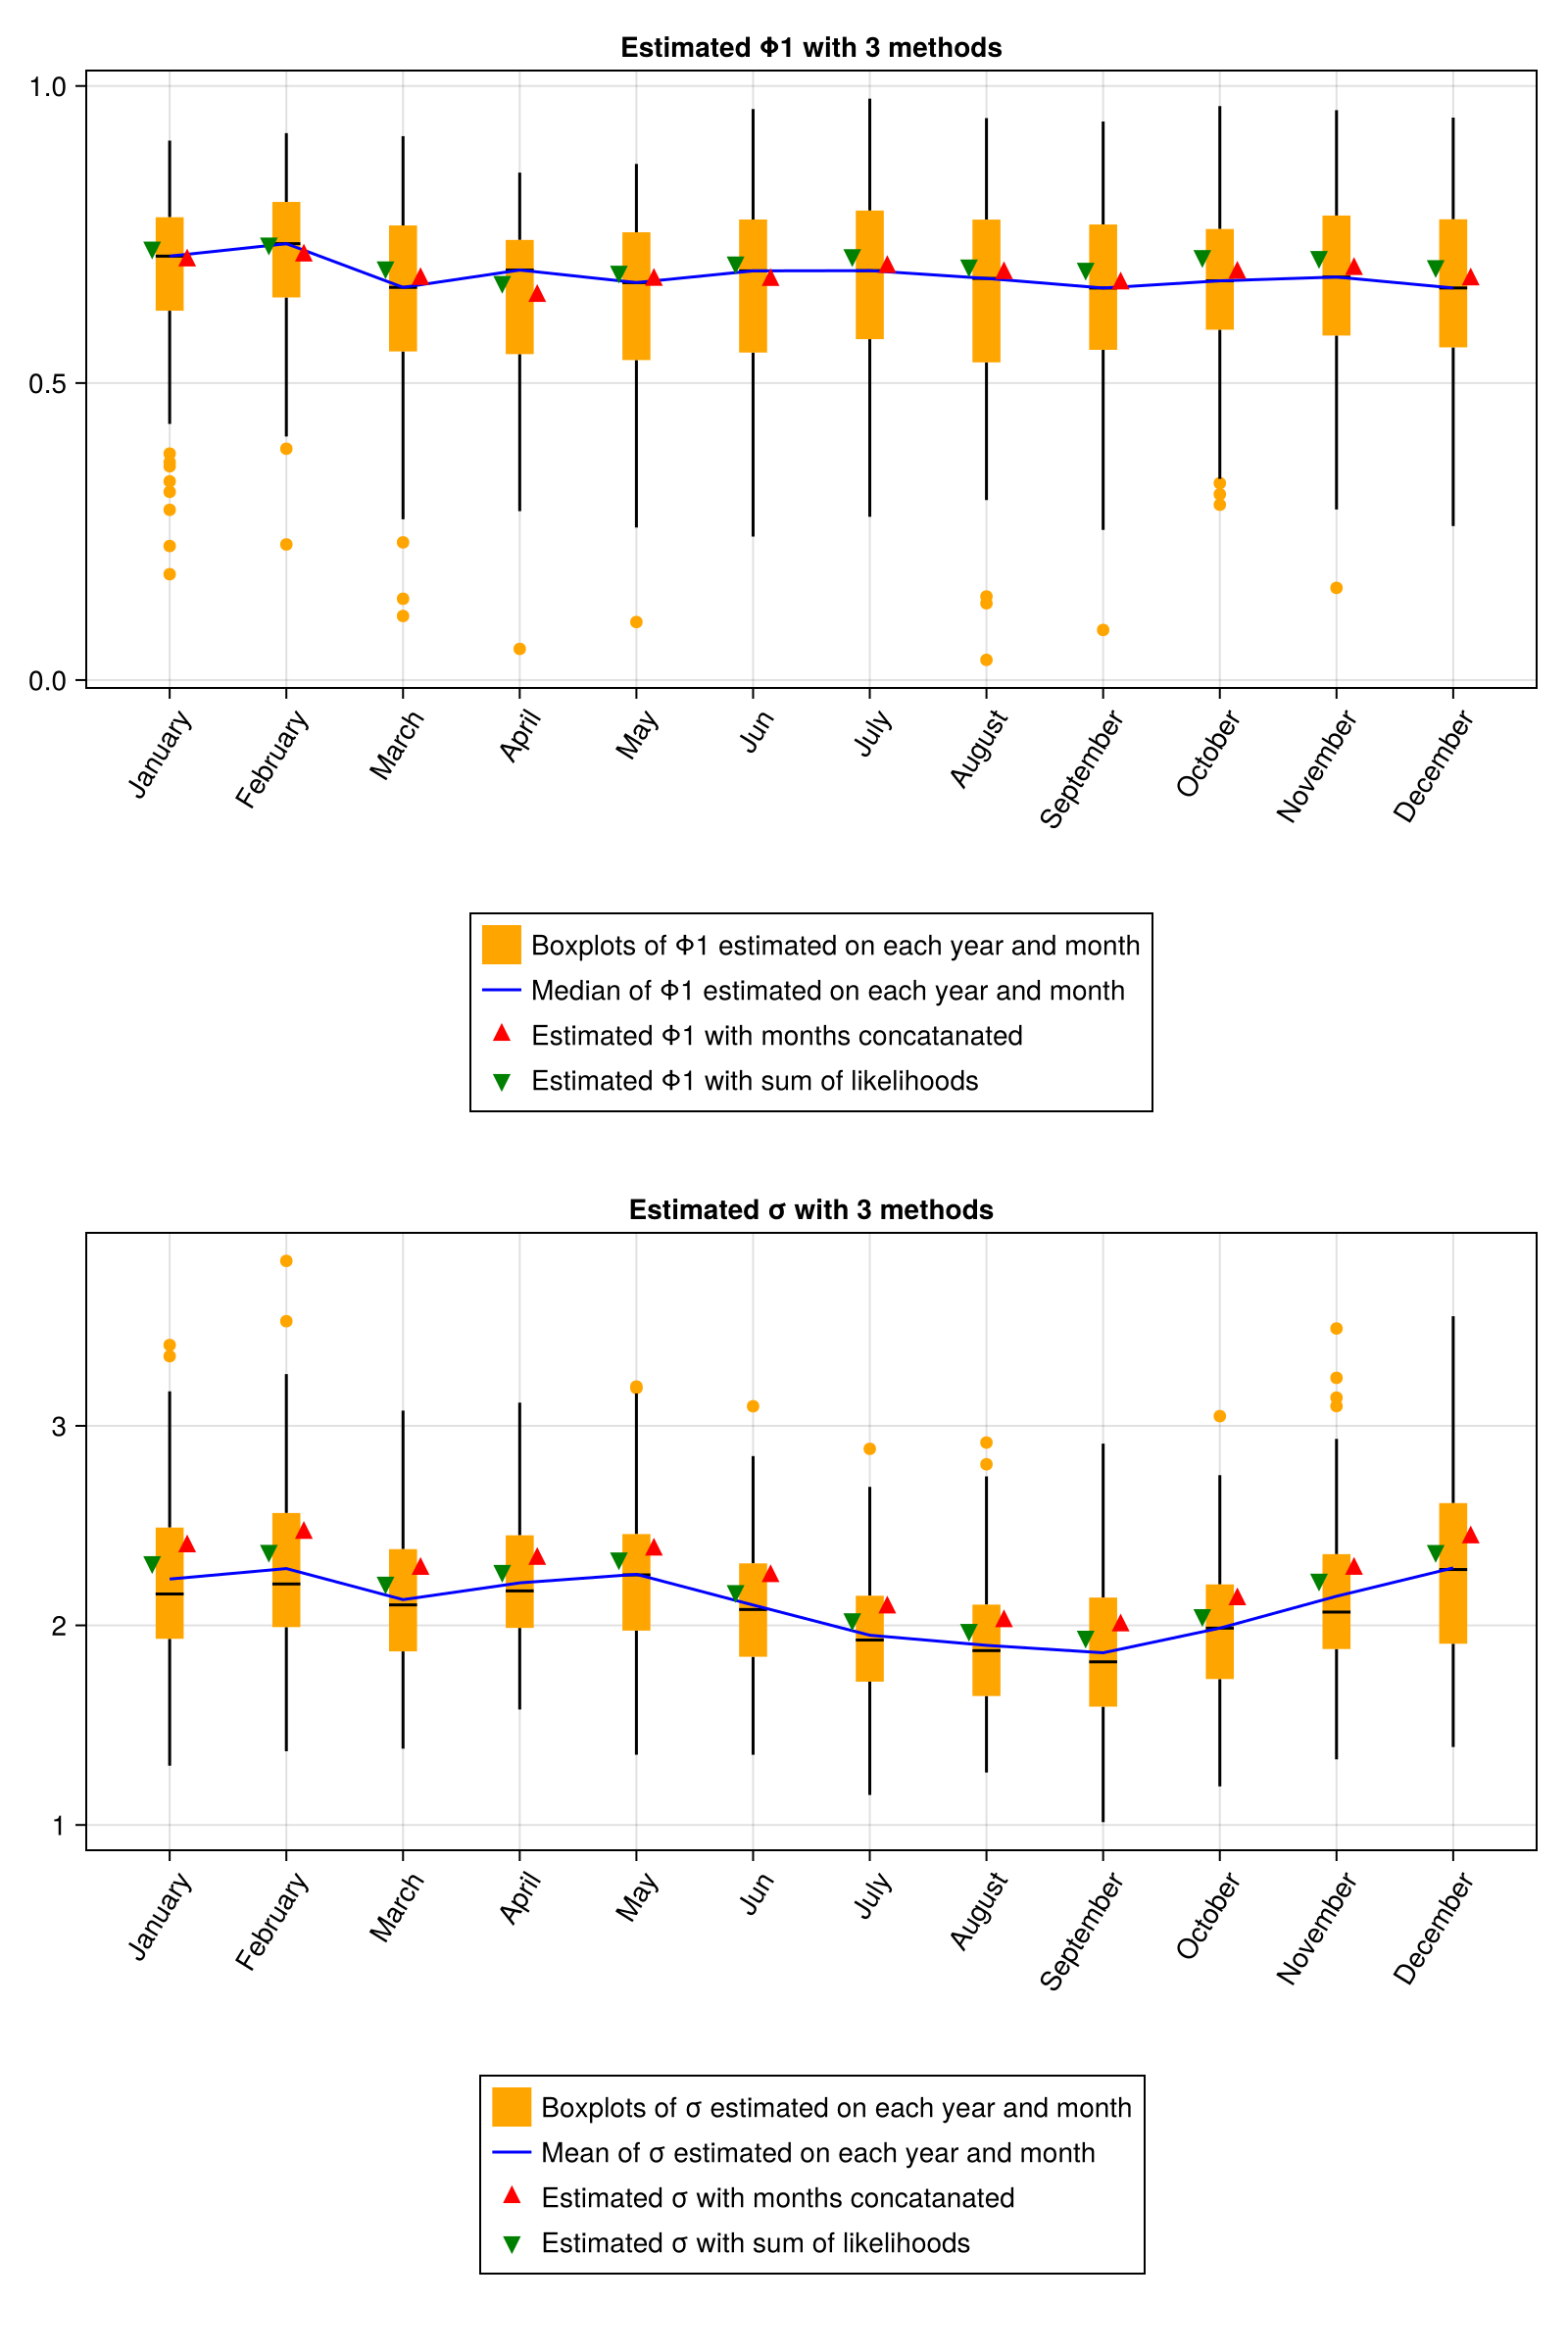

CairoMakie.Screen{IMAGE}


In [7]:
include(raw"..\utils\Estimation.jl")
Params, figure= AllEstimation(Monthly_temp, lineplot=true)
display(figure)

## Simulation

### With estimation on each month

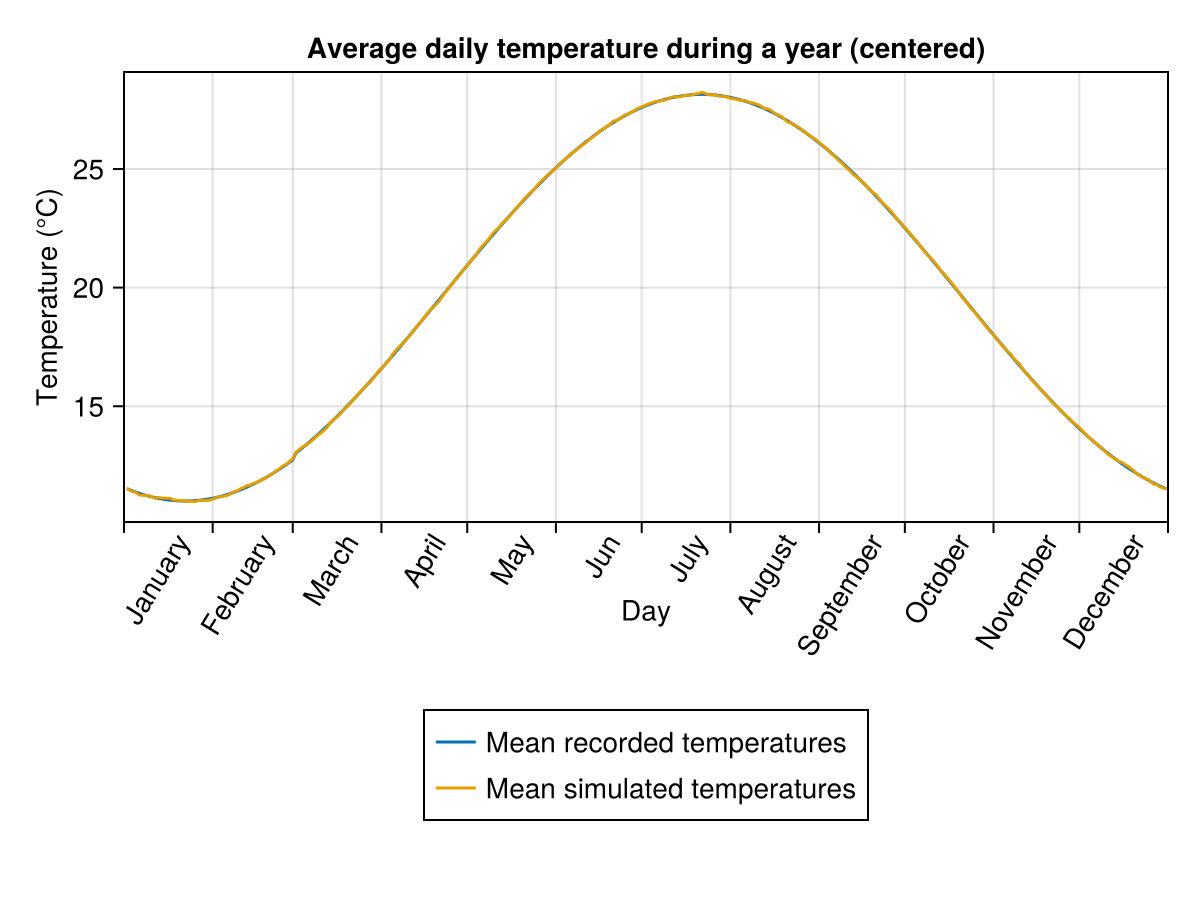

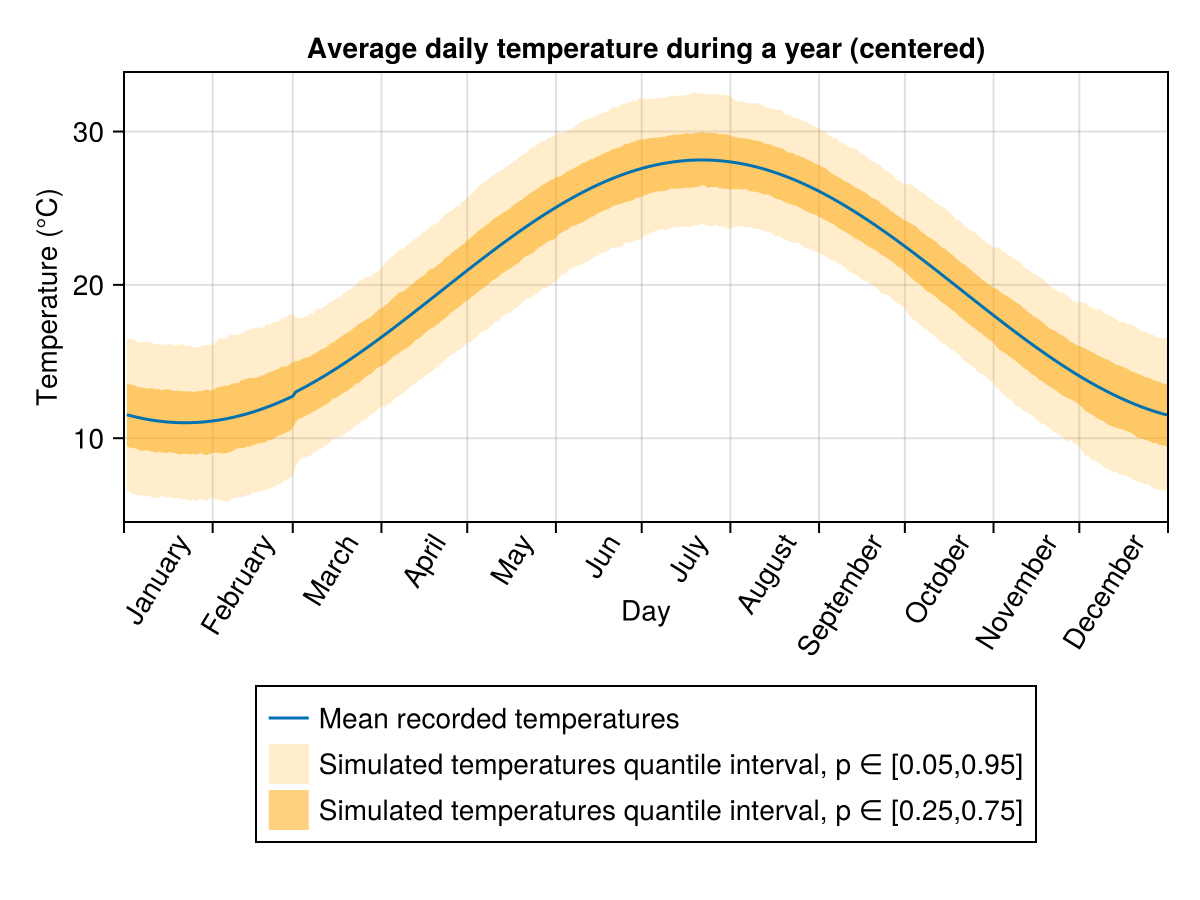

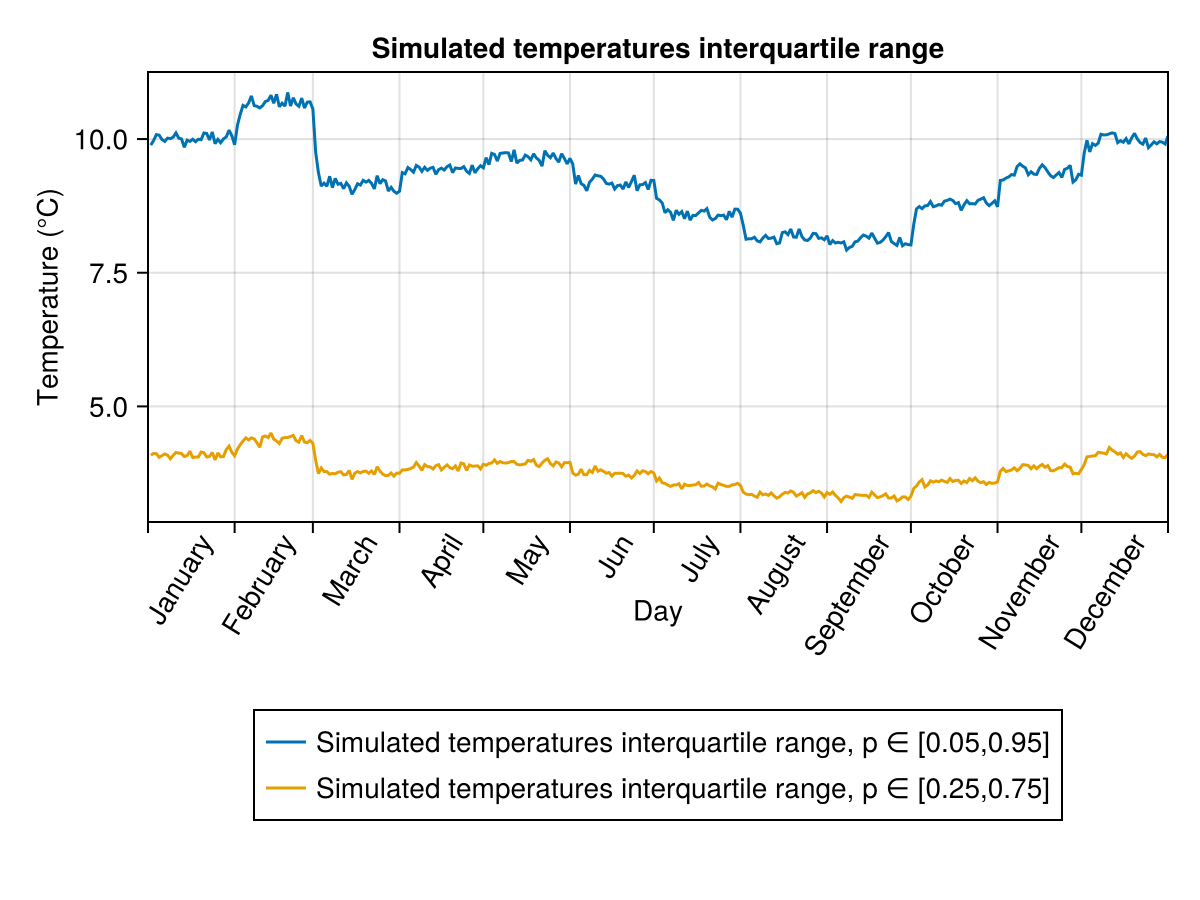

CairoMakie.Screen{IMAGE}


In [8]:
include("../utils/Simulation.jl")
include("../utils/Plotting.jl")
period=[periodicity[1:59] ; periodicity[61:366]]
Φ_month_mean,σ_month_mean=TakeParameters(Params,"mean")
# Monthly_temp[1][1][1]::AbstractVector
# Φ_month_mean::AbstractVector
sample_ = SimulateYears(Monthly_temp[1][1][1],series.DATE[1],Φ_month_mean,σ_month_mean, 100 * 105)
sample_ = invert(sample_ + repeat([period],length(sample_))) 
display(PlotYearCurves([period,mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(period,
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))
display(PlotYearCurves([quantile.(sample_,0.95) .- quantile.(sample_,0.05) , quantile.(sample_,0.75) .- quantile.(sample_,0.25)],
["Simulated temperatures interquartile range, p ∈ [0.05,0.95]" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))

We see clearly that interquartile range is shorter during summer and larger during winter.

### With months concatanation

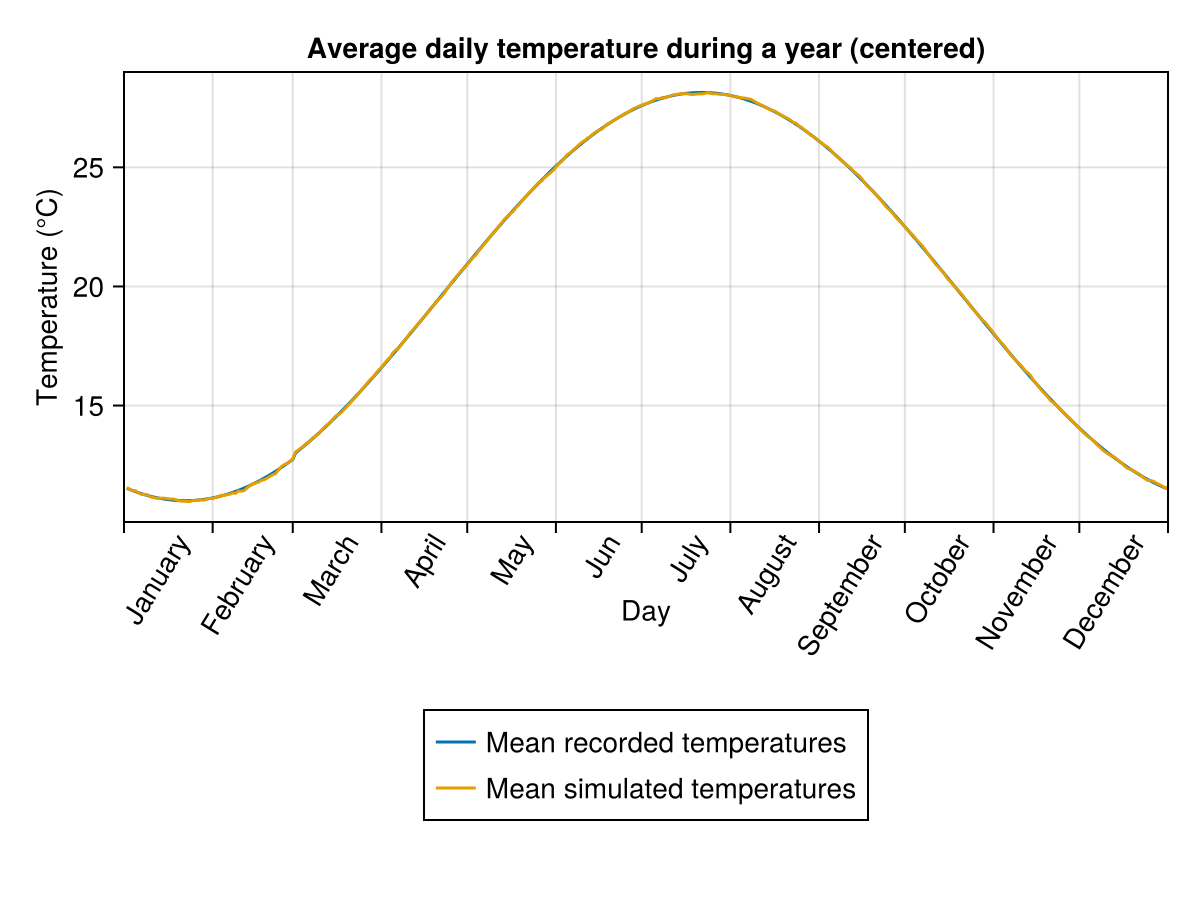

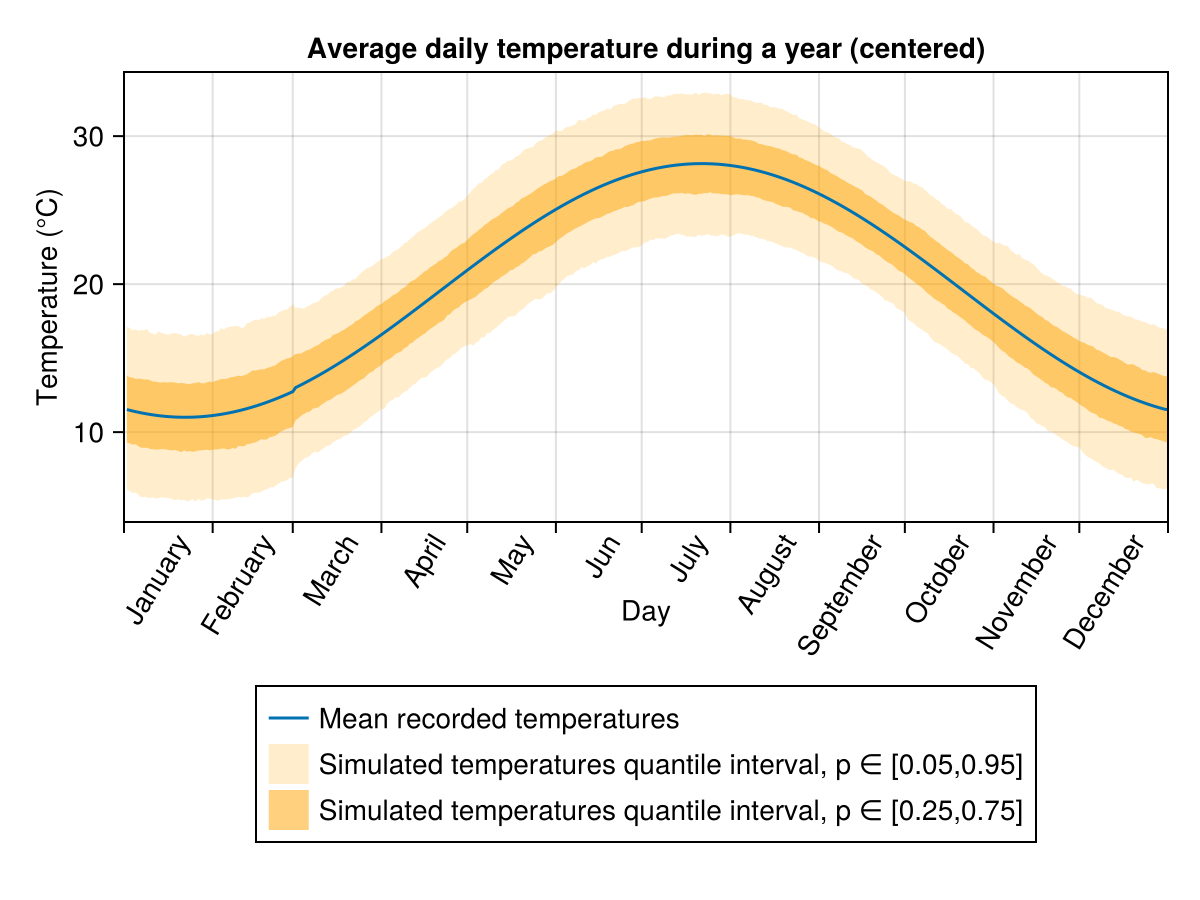

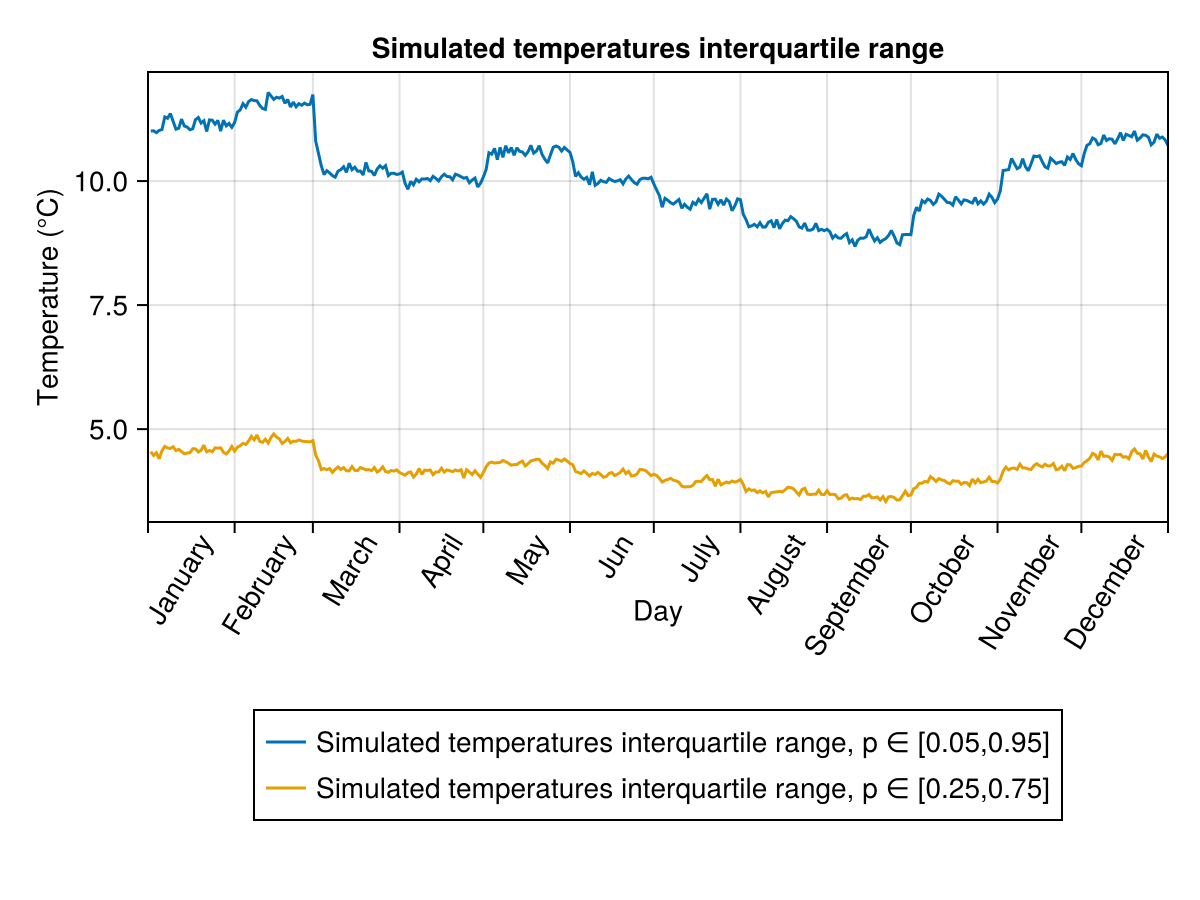

CairoMakie.Screen{IMAGE}


In [9]:
period=[periodicity[1:59] ; periodicity[61:366]]
Φ_month_mean,σ_month_mean=TakeParameters(Params,"concat")
sample_ = SimulateYears(Monthly_temp[1][1][1],series.DATE[1],Φ_month_mean,σ_month_mean, 100 * 105)
sample_ = invert(sample_ + repeat([period],length(sample_))) 
display(PlotYearCurves([period,mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(period,
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))
display(PlotYearCurves([quantile.(sample_,0.95) .- quantile.(sample_,0.05) , quantile.(sample_,0.75) .- quantile.(sample_,0.25)],
["Simulated temperatures interquartile range, p ∈ [0.05,0.95]" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))

### With sum of likelihoods

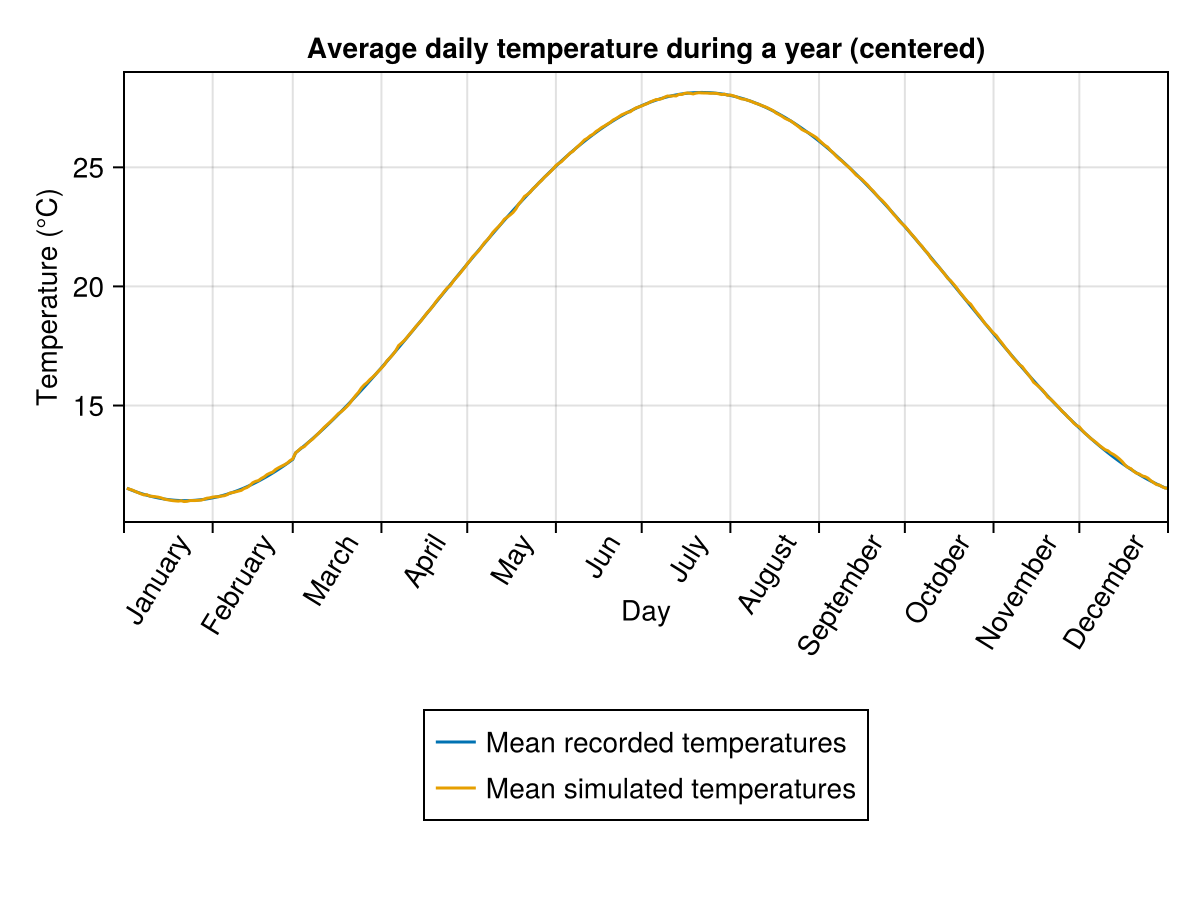

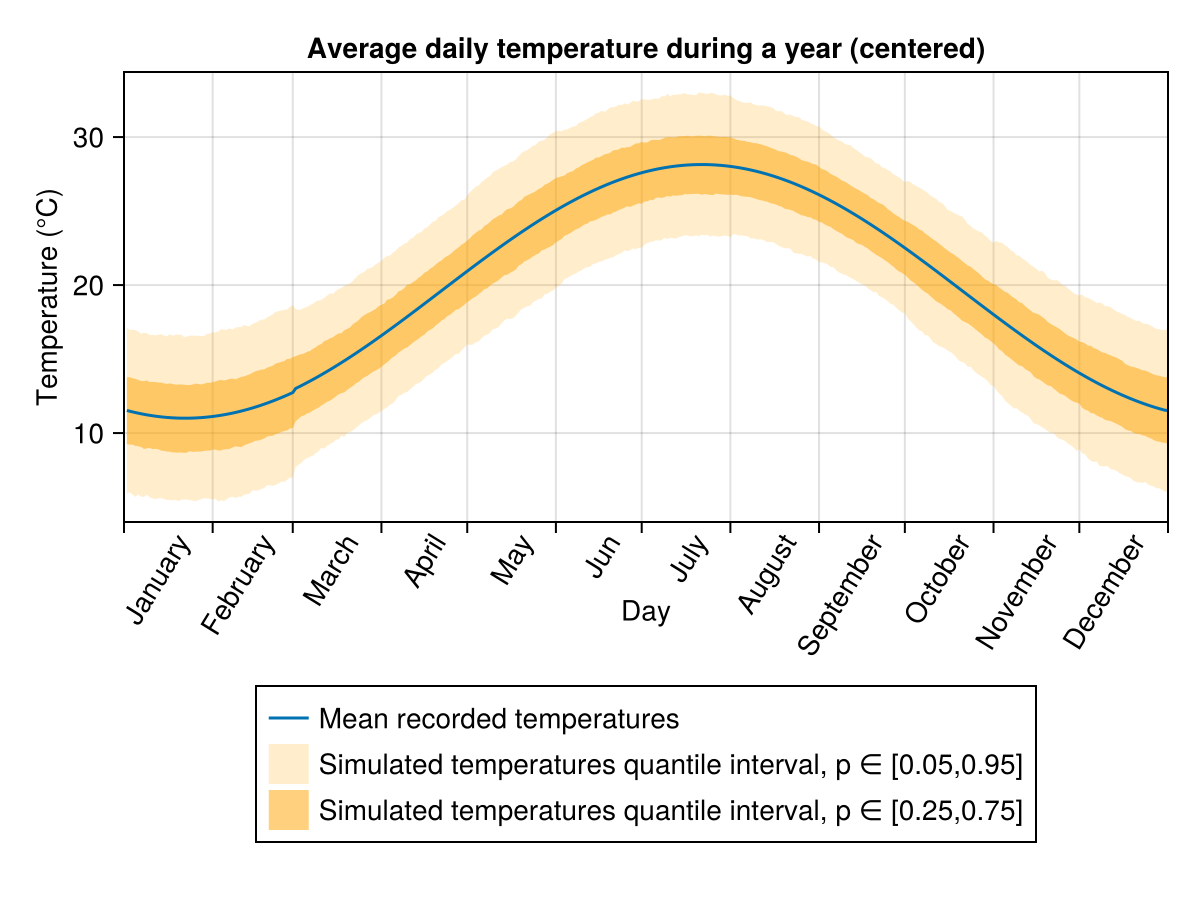

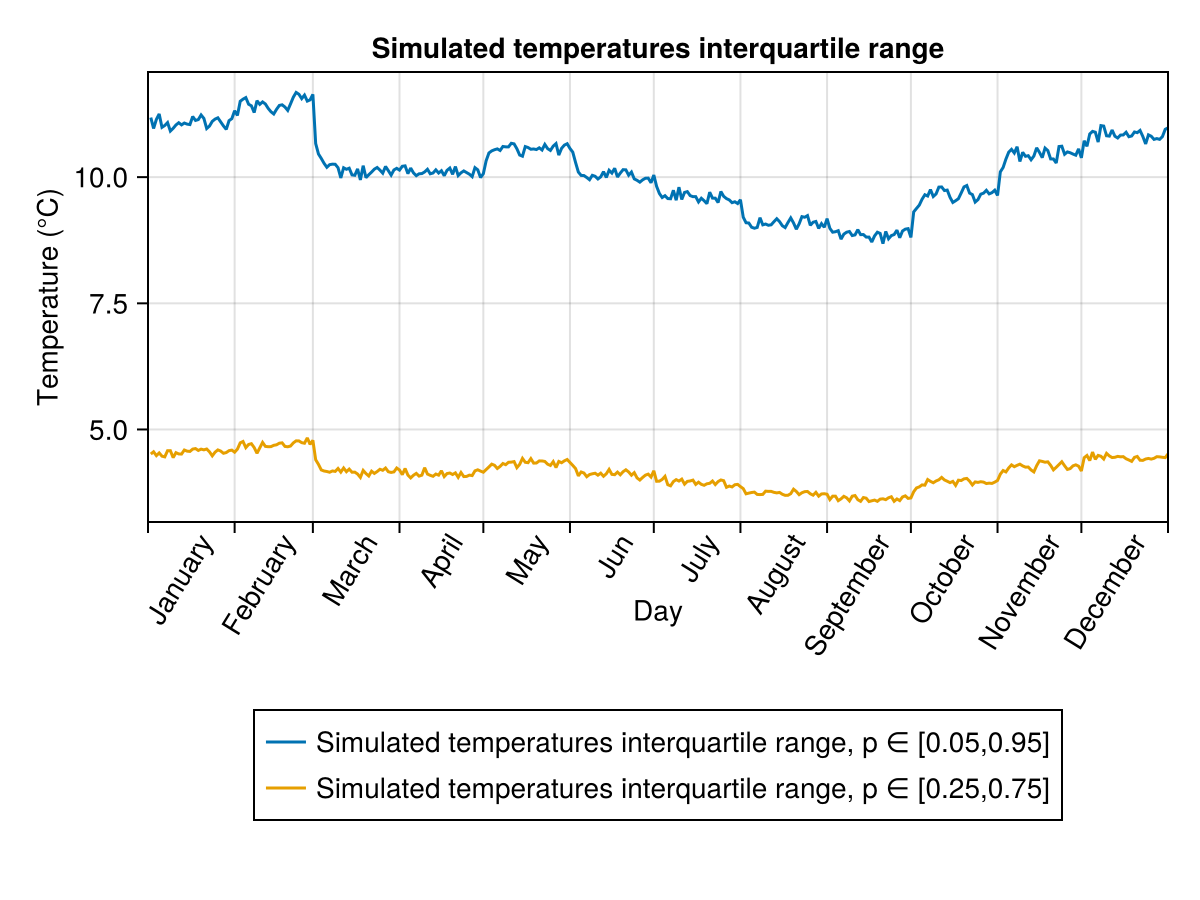

CairoMakie.Screen{IMAGE}


In [10]:
period=[periodicity[1:59] ; periodicity[61:366]]
Φ_month_mean,σ_month_mean=TakeParameters(Params,"sumLL")
sample_ = SimulateYears(Monthly_temp[1][1][1],series.DATE[1],Φ_month_mean,σ_month_mean, 100 * 105)
sample_ = invert(sample_ + repeat([period],length(sample_))) 
display(PlotYearCurves([period,mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(period,
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))
display(PlotYearCurves([quantile.(sample_,0.95) .- quantile.(sample_,0.05) , quantile.(sample_,0.75) .- quantile.(sample_,0.25)],
["Simulated temperatures interquartile range, p ∈ [0.05,0.95]" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))

# Estimation AR(2)

## Estimation

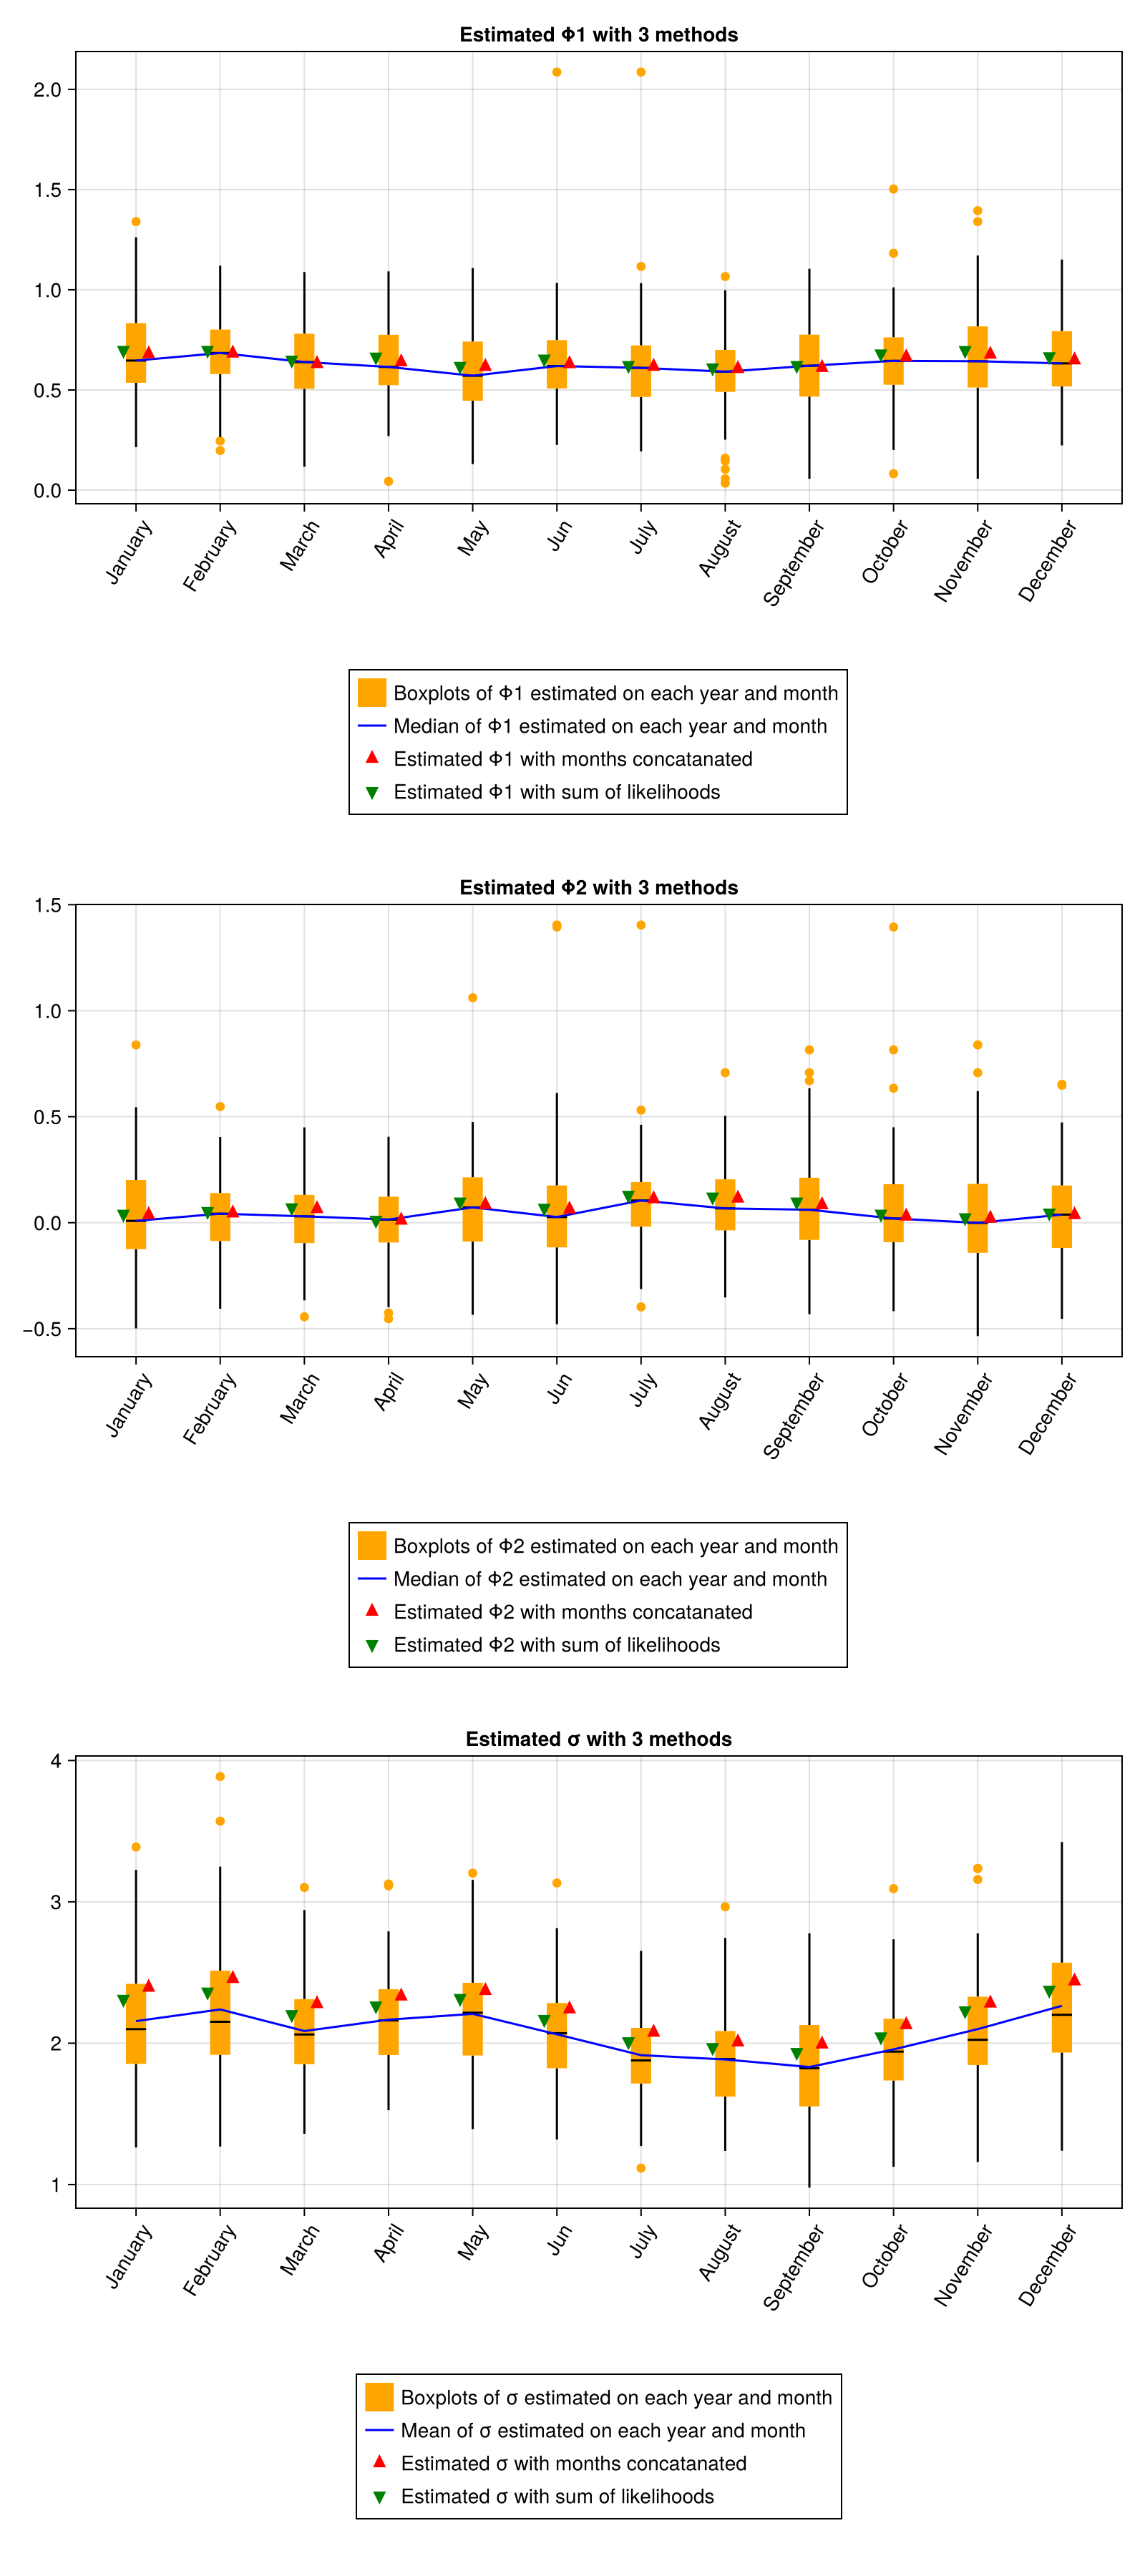

In [ ]:
include("../utils/Estimation.jl")
Params, figure= AllEstimation(Monthly_temp, 2, lineplot=true)
display(figure)